In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\\dengue.csv')

In [3]:
data

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
data['Year'] = data['Year'].astype('int')
region_order = ['BARMM', 'CAR', 'NCR', 'Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region IX', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region X', 'Region XI', 'Region XII', 'Region XIII']
data['Region'] = pd.Categorical(data['Region'], categories=region_order, ordered=True)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)
data.dtypes


Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Regional Distribution of Dengue Fatalities</h1>

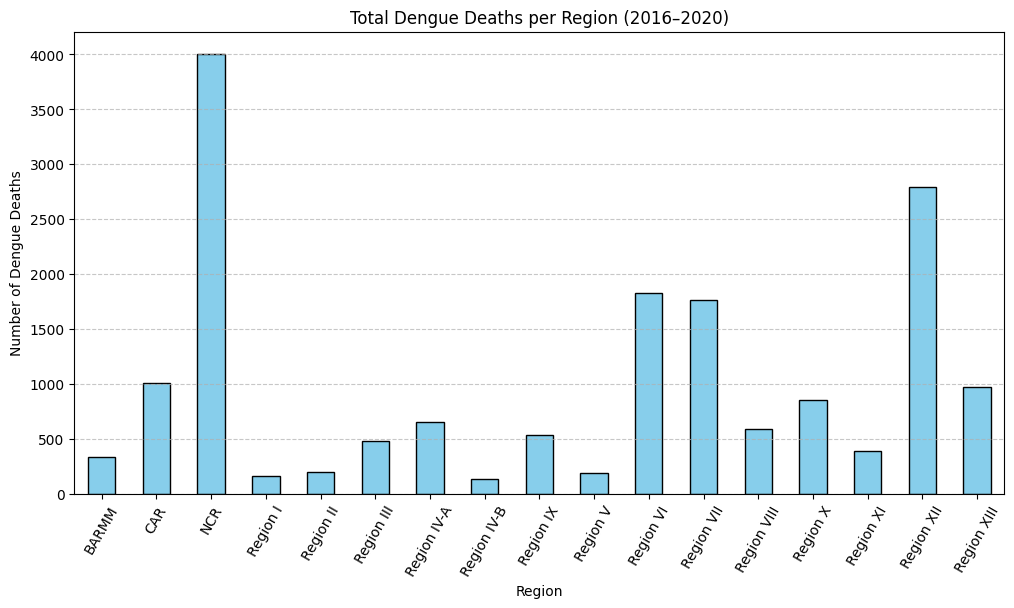

In [5]:
region_deaths = data.groupby("Region")["Dengue_Deaths"].sum()

region_deaths.plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')

plt.xlabel('Region')
plt.ylabel('Number of Dengue Deaths')
plt.title('Total Dengue Deaths per Region (2016–2020)')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>INSIGHT 1: Based on the visualization, it is evident that the NCR (National Capital Region) recorded the highest total number of dengue-related deaths, followed by Region XII. The total deaths in NCR surpassed the 4,000 mark, indicating a high fatality rate in the area. Although Region XII had fewer total deaths than NCR, it exhibited the highest mortality rate, making it relatively more fatal in proportion to its dengue cases.</h3>

<h3>INSIGHT 2: Meanwhile, regions such as BARMM, Region I, Region II, Region V, Region IV-B, Region IX, and Region XI recorded relatively low numbers of dengue-related deaths, suggesting better disease control measures or more effective medical response in those areas.</h3>

<h1>Regional Comparison of Dengue Mortality Rates</h1>

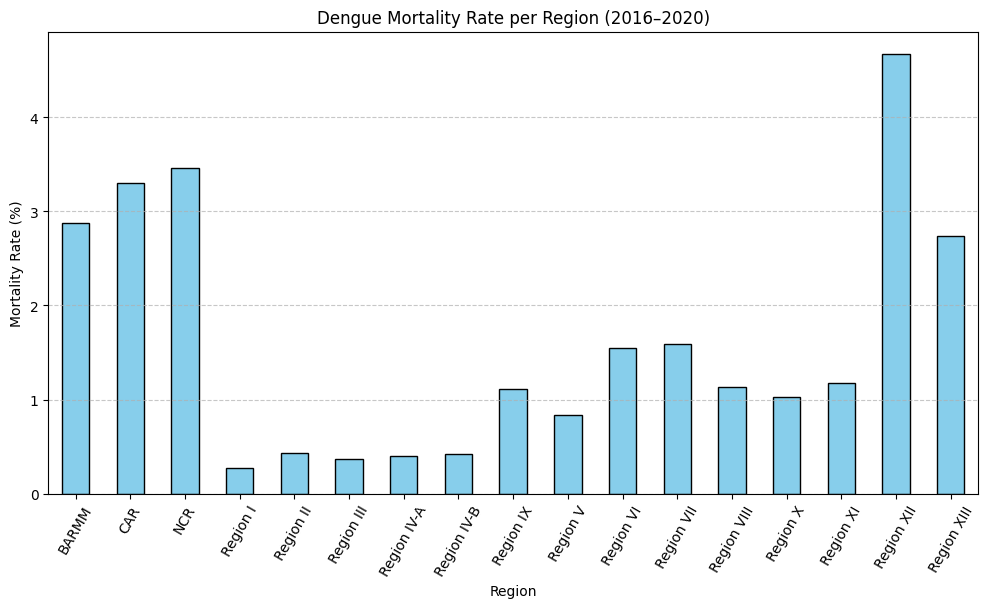

In [6]:
mortality = data.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
mortality["Mortality_Rate"] = np.round((mortality["Dengue_Deaths"] / mortality["Dengue_Cases"]) * 100, 2)

mortality.set_index("Region")["Mortality_Rate"].plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')

plt.xlabel('Region')
plt.ylabel('Mortality Rate (%)')
plt.title('Dengue Mortality Rate per Region (2016–2020)')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>INSIGHT 3: Based on the overall trend, the mortality rate varies across regions. It is evident that Region XII (SOCCSKSARGEN) recorded the highest mortality rate, exceeding the 4% mark. This suggests that the region may have limited access to healthcare facilities, such as clinics or hospitals, which could have contributed to the higher fatality rate compared to other regions.</h3>

<h3>INSIGHT 4: Meanwhile, Regions I, II, III, IV-A, and IV-B recorded the lowest mortality rates, all falling below the 1% mark despite having numerous dengue cases. This suggests that these regions likely have better access to healthcare facilities and more effective medical services, contributing to lower fatality rates</h3>

<H1>Dengue Incidence by Region (2016–2020)</H1>

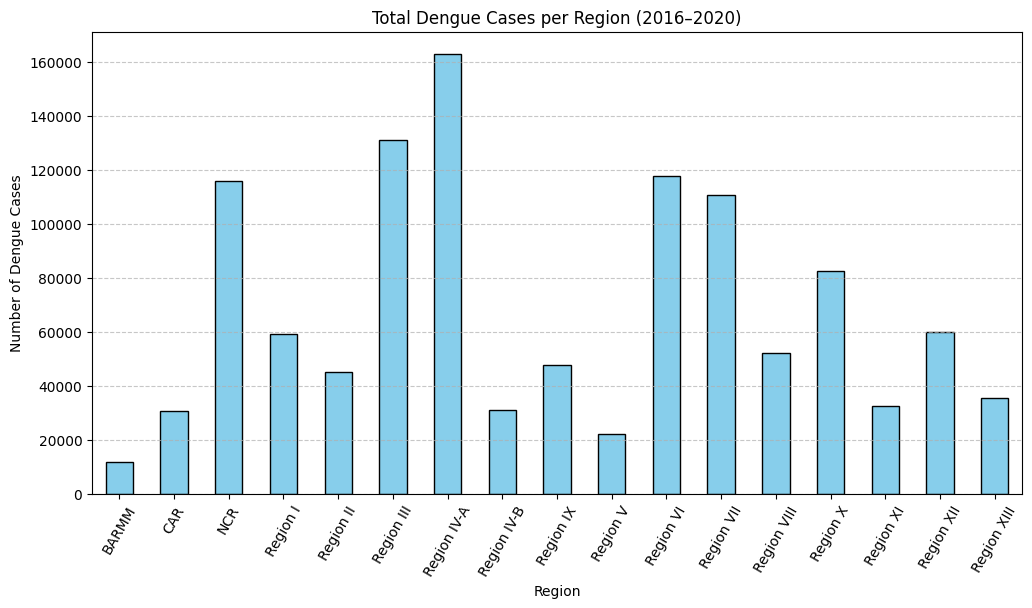

In [8]:
region_cases = data.groupby('Region')['Dengue_Cases'].sum()

region_cases.plot(kind='bar', figsize=(12,6), color='skyblue', edgecolor='black')

plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.title('Total Dengue Cases per Region (2016–2020)')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<H3>INSIGHT 5: Moving on to NCR, Region III, Region VII, and Region VI, these areas also showed consistently high numbers of dengue cases. This is likely due to their dense populations and the presence of mosquito breeding grounds, similar to Region IV-A. In contrast, BARMM and Region V recorded the lowest number of dengue cases, possibly because of their lower population density and potential challenges in case reporting, which may have contributed to the lower recorded figures.</H3>

<H3>INSIGHT 6: Based on our Graph, Region IV-A remains the highest Total Cases of Dengue from 2016 - 2020. Which is quite understable due to the population that Region IV-A have, which is 16,195,042.</H3>

<H3>INSIGHT 7: Overall, we can say that this Trend highlighed the Regions that have dense populations, which can result in high dengue cases. Using these findings we can say that every regions need some interventions, espcecially on Region IV-A (my region), to have more awareness on these types of issue.</H3>

<H1>Annual Dengue Case Trend (2016–2020)</H1>

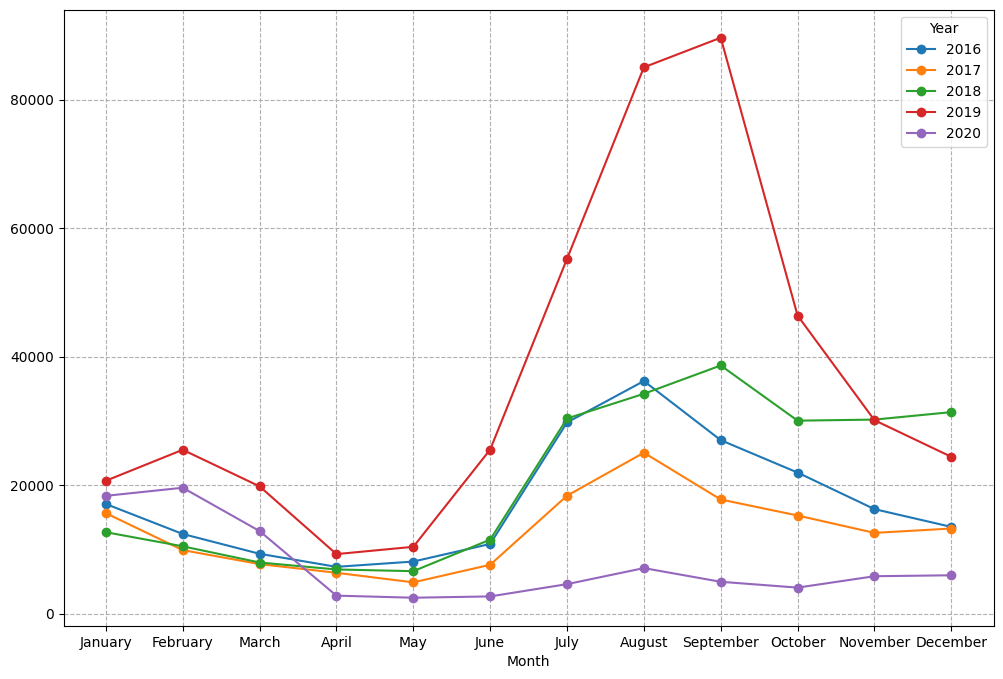

In [9]:
monthly_cases = data.groupby([data.Month, data.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line', marker='o')
plt.gcf().set_size_inches(12,8)
plt.grid(True, linestyle='--')
plt.xticks(range(0,12), month_order)
plt.show()

<H3>INSIGHT 8: After the spike in dengue cases in 2019, we can observe a noticeable decline in 2020. This trend suggests that the COVID-19 pandemic had an impact on dengue case numbers. Measures such as restricted movement, increased sanitation due to pandemic concerns, and possible underreporting of dengue cases likely contributed to this decline.</H3>

<H3>INSIGHT 9: Using the line graph analysis, we can observe the trend of dengue cases from 2016 to 2020. Notably, 2019 recorded the highest number of cases. Various sources suggest that this spike was influenced by the Dengvaxia controversy. While the controversy did not directly cause the dengue epidemic, it undermined public confidence in health interventions. Consequently, when the 2019 wet season arrived, both health system preparedness and community response were less effective, resulting in the largest dengue outbreak in Philippine history.</H3>

<H3>INSIGHT 10: Overall, from 2016 to 2020, dengue cases exhibited a seasonal peak during the rainy season. The 2019 outbreak was the most severe, influenced by favorable conditions for mosquitoes and reduced public trust following the Dengvaxia controversy. In 2020, cases declined, likely due to COVID-19 lockdowns and improved sanitation practices. This trend underscores the importance of early prevention measures and enhanced community awareness to better control future dengue outbreaks.</H3>